In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (6, 8) # указываем размер визуализации

In [3]:
# чтобы вывести всю таблицу на экран

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# creating a dataframe
polomki = pd.read_csv(
    "C:\\Users\\HOME\\ya_datasets\\polomki.csv",
    index_col="Магазин"
)

In [5]:
print(polomki)

                            Неделя 1  Неделя 2  Неделя 3  Неделя 4  Неделя 5  \
Магазин                                                                        
Роботович и Ко                  0.93      0.07      0.76      0.29      1.19   
Супергаджет                     0.23      0.36      0.14      0.51      0.65   
Робокот Насущный                0.09      0.93      0.58      0.03      0.33   
Гаджонг                         0.22      0.94      0.31      0.85      1.26   
Робопром                        0.82      0.49      0.08      1.07      0.79   
Роботёрочка                     0.23      1.03      0.14      1.06      0.91   
Гаджетилла                      0.38      0.78      0.56      0.32      0.88   
Мурдроид                        0.94      0.88      0.18      0.88      0.91   
Кибервилл                       0.01      0.63      0.46      0.34      0.06   
ЭльКотадо                       0.63      0.75      0.52      0.22      1.15   
Гаджет-молл                     0.07    

In [6]:
# убедимся, что это числа
polomki_num = polomki.apply(pd.to_numeric, errors="coerce")

## 1) Heatmap по z-score (сравним динамику): ***насколько текущее значение необычно***
### Z-score показывает, насколько значение отклоняется от среднего в единицах стандартного отклонения.

#### Интерпретация z-score

| z-score | Значение |
|---------|-----------|
| 0 | нормальное значение |
| ±1 | немного выше / ниже нормы |
| ±2 | сильное отклонение |
| ±3 | почти аномалия |

##### Смысл: показать отклонения от нормального уровня для каждого магазина, а не абсолютные значения. Хорошо, когда магазины “разного масштаба”, но важно увидеть всплески.

In [7]:
# z-score по строкам (по каждому магазину)
z = polomki_num.sub(polomki_num.mean(axis=1), axis=0).div(polomki_num.std(axis=1).replace(0, np.nan), axis=0)
print(z)

                            Неделя 1  Неделя 2  Неделя 3  Неделя 4  Неделя 5  \
Магазин                                                                        
Роботович и Ко              0.318175 -1.646351 -0.070162 -1.143798  0.912101   
Супергаджет                -0.880112 -0.640321 -1.046121 -0.363639 -0.105403   
Робокот Насущный           -0.924646  0.787769  0.074263 -1.046962 -0.435385   
Гаджонг                    -1.090212  0.293835 -0.917206  0.120830  0.908968   
Робопром                    0.200587 -0.517793 -1.410326  0.744814  0.135279   
Роботёрочка                -0.944701  0.582089 -1.116465  0.639343  0.353070   
Гаджетилла                 -0.739775  0.214773 -0.310228 -0.882957  0.453410   
Мурдроид                    0.011362 -0.124986 -1.715722 -0.124986 -0.056812   
Кибервилл                  -1.064183 -0.079417 -0.349433 -0.540033 -0.984767   
ЭльКотадо                  -0.282191  0.029704 -0.568095 -1.347832  1.069354   
Гаджет-молл                -1.112157 -0.

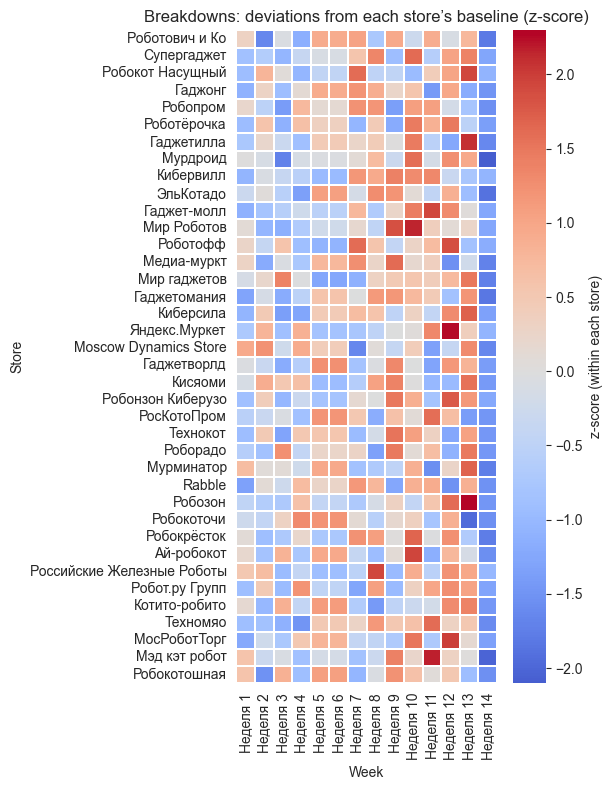

In [11]:
sns.heatmap(
    z,
    cmap="coolwarm",
    center=0,
    linewidths=0.2,
    cbar_kws={"label": "z-score (within each store)"}
)
plt.title("Breakdowns: deviations from each store’s baseline (z-score)")
plt.xlabel("Week")
plt.ylabel("Store")
plt.tight_layout()
plt.show()

## Анализ динамики поломок по z-score

Heatmap показывает отклонения уровня поломок каждого магазина относительно его собственного среднего уровня.

Цвета означают:
- синий — поломок меньше обычного,
- белый — около нормального уровня,
- красный — поломок больше обычного.

### Основные наблюдения

**1. Первые недели в целом стабильны**
В начале периода большинство магазинов имеют значения около нормы или ниже неё. Сильных отклонений немного.

**2. Рост проблем к середине периода**
Примерно с 6–7 недели начинают появляться зоны с положительными z-score, что означает рост числа поломок относительно обычного уровня.

**3. Пик аномалий приходится на недели 9–12**
На графике видно много красных областей именно в этот период. Это говорит о том, что у большого числа магазинов одновременно произошёл рост поломок.

Это может быть связано с:
- сезонной нагрузкой,
- увеличением потока клиентов,
- проблемами в поставках или обслуживании,
- износом оборудования.

**4. Некоторые магазины показывают системные всплески**
В отдельных строках красные зоны повторяются несколько раз, что говорит о нестабильной работе конкретных магазинов.

**5. В конце периода ситуация частично стабилизируется**
На последних неделях снова появляются более нейтральные и синие значения, что говорит о снижении отклонений.

### Главный аналитический вывод

Проблемы с поломками носят не случайный характер — в середине периода наблюдается системное ухудшение работы многих магазинов одновременно.

Это указывает скорее на общую операционную проблему или рост нагрузки, чем на локальные неисправности отдельных точек.

### Рекомендация для бизнеса

Необходимо:
- проверить события, происходившие в период недель 9–12,
- выделить магазины с повторяющимися всплесками,
- проанализировать нагрузку и обслуживание оборудования в этот период.


## 2) Percentile/Robust scaling (устойчиво к выбросам)
#### Смысл: не дать одному столбцу/выбросу “сломать” шкалу.

In [16]:
# ограничим цветовую шкалу heatmap, чтобы выбросы не ломали визуализацию

vmin = polomki_num.quantile(0.02).min()
vmax = polomki_num.quantile(0.98).max()

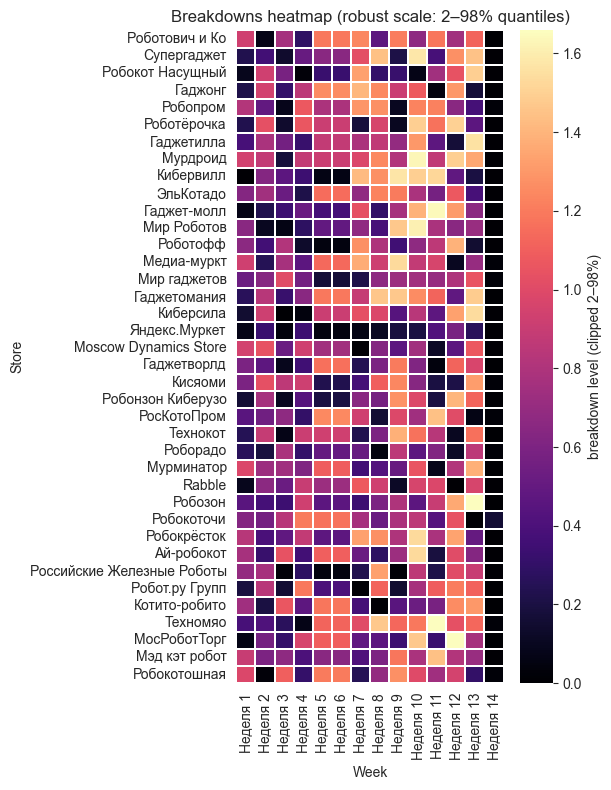

In [17]:
sns.heatmap(
    polomki_num,
    cmap="magma",
    vmin=vmin,
    vmax=vmax,
    linewidths=0.2,
    cbar_kws={"label": "breakdown level (clipped 2–98%)"}
)
plt.title("Breakdowns heatmap (robust scale: 2–98% quantiles)")
plt.xlabel("Week")
plt.ylabel("Store")
plt.tight_layout()
plt.show()

## Анализ heatmap (robust scale: 2–98% quantiles)

Тепловая карта показывает распределение уровня поломок по магазинам и неделям. Цвет отражает интенсивность поломок: тёмные значения соответствуют низкому уровню, светлые — повышенному.

### Основные наблюдения

**1. Поломки усиливаются к середине и концу периода**
Видно, что на неделях примерно с 8 по 13 у многих магазинов появляются более светлые зоны. Это означает рост уровня поломок относительно остального периода.

**2. Существуют магазины с устойчиво высоким уровнем поломок**
Некоторые строки остаются более светлыми на протяжении нескольких недель подряд, что говорит о системных проблемах в этих точках.

**3. Есть локальные всплески**
У части магазинов наблюдаются одиночные светлые клетки — это кратковременные скачки поломок, которые могут быть связаны с разовыми событиями или нагрузками.

**4. Конец периода наиболее проблемный**
Недели ближе к завершению наблюдений показывают больше светлых участков, что указывает на накопление проблем или рост нагрузки.

### Главный аналитический вывод

Проблемы с поломками распределены неравномерно: часть магазинов демонстрирует системно высокий уровень поломок, а в середине и конце периода наблюдается общий рост проблем по сети.

### Рекомендации для бизнеса

- проверить причины ухудшения ситуации в середине и конце периода,
- отдельно проанализировать магазины с устойчиво высоким уровнем поломок,
- проверить обслуживание оборудования и нагрузку в проблемные недели.


In [14]:
# сортировка по среднему уровню (можно заменить на max/последние недели)
order = polomki_num.mean(axis=1).sort_values(ascending=False).index
sorted_df = polomki_num.loc[order]

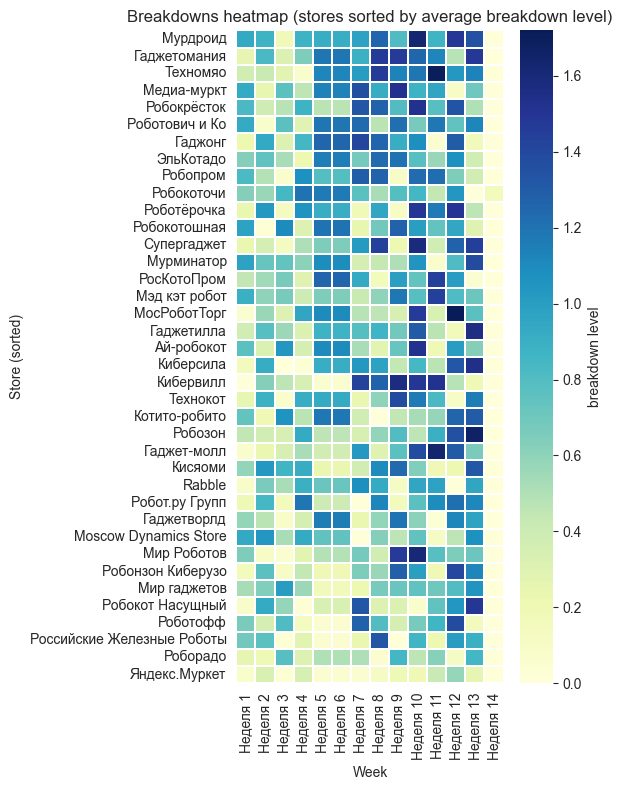

In [22]:
sns.heatmap(
    sorted_df,
    cmap="YlGnBu",
    linewidths=0.2,
    cbar_kws={"label": "breakdown level"}
)

plt.title("Breakdowns heatmap (stores sorted by average breakdown level)")
plt.xlabel("Week")
plt.ylabel("Store (sorted)")
plt.tight_layout()
plt.show()

<Axes: ylabel='Магазин'>

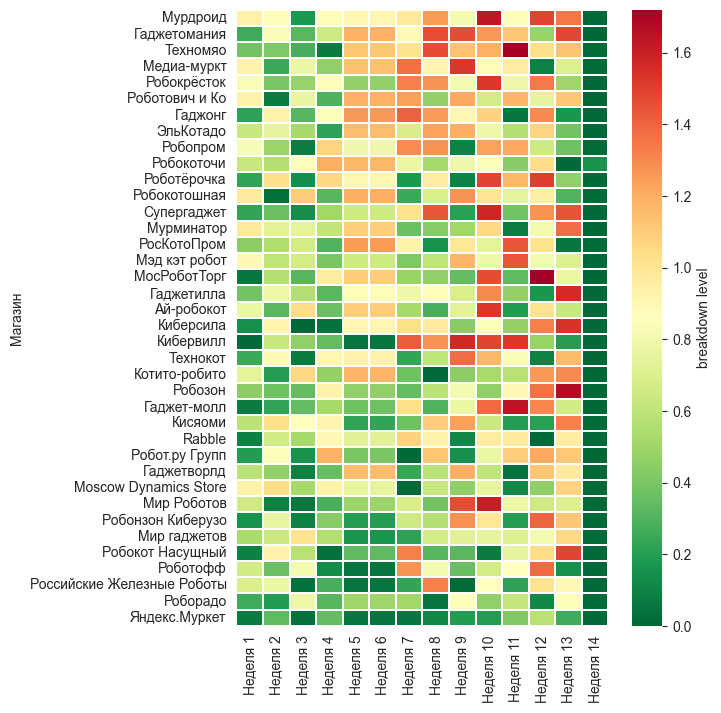

In [23]:
sns.heatmap(
    sorted_df,
    cmap="RdYlGn_r",  # reversed: green -> red
    linewidths=0.2,
    cbar_kws={"label": "breakdown level"}
)


## Анализ heatmap: магазины отсортированы по уровню риска

В данной визуализации магазины отсортированы по среднему уровню поломок, поэтому наиболее проблемные точки находятся в верхней части графика, а наиболее стабильные — в нижней.

### Основные наблюдения

**1. Верхняя часть heatmap содержит магазины с наибольшим уровнем поломок**
Эти магазины демонстрируют повышенные значения в течение многих недель и требуют первоочередного анализа.

**2. Нижняя часть списка показывает наиболее стабильные магазины**
Здесь уровень поломок остаётся низким на протяжении всего периода наблюдения.

**3. Проблемные недели видны сразу для группы магазинов**
Отсортированная структура позволяет увидеть недели, когда сразу несколько рискованных магазинов демонстрируют рост поломок.

**4. Видна концентрация риска**
Часть магазинов стабильно формирует основную долю проблем, в то время как остальные работают значительно устойчивее.

### Главный аналитический вывод
Большая часть рисков сосредоточена в ограниченном числе магазинов. Это означает, что улучшение ситуации возможно за счёт целевой работы с конкретными точками, а не через масштабные изменения по всей сети.

### Практическое применение
Такая сортировка позволяет:
- быстро определить приоритетные магазины для проверки,
- выделить топ-магазины по уровню риска,
- планировать обслуживание оборудования более эффективно.